Seeding for repository

In [2]:
# Set seeds for reproductability
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing Dependencies

In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models


**Data Curation**

Upload the kaggle.json file

In [2]:
!pip install kaggle

In [5]:
kaggle_credentials=json.load(open("/content/kaggle key.json"))

In [6]:
# Setup Kaggle API as environment variable

os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']


In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 99% 2.02G/2.04G [00:19<00:00, 184MB/s]
100% 2.04G/2.04G [00:19<00:00, 111MB/s]


In [8]:
!ls

'kaggle key.json'   plantvillage-dataset.zip   sample_data


In [9]:
# Unzip the download dataset
with ZipFile('plantvillage-dataset.zip','r') as zip:
  zip.extractall()
  print('Done')


Done


In [10]:
print(os.listdir('plantvillage dataset'))

print(len(os.listdir('plantvillage dataset/segmented')))
print(os.listdir('plantvillage dataset/segmented')[:5])

print(len(os.listdir('plantvillage dataset/color')))
print(os.listdir('plantvillage dataset/color')[:5])

print(len(os.listdir('plantvillage dataset/grayscale')))
print(os.listdir('plantvillage dataset/grayscale')[:5])

['grayscale', 'segmented', 'color']
38
['Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Blueberry___healthy', 'Grape___Black_rot', 'Corn_(maize)___healthy']
38
['Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Blueberry___healthy', 'Grape___Black_rot', 'Corn_(maize)___healthy']
38
['Grape___Esca_(Black_Measles)', 'Tomato___Tomato_mosaic_virus', 'Blueberry___healthy', 'Grape___Black_rot', 'Corn_(maize)___healthy']


Number of Classes - 38

In [11]:
print(len(os.listdir('/content/plantvillage dataset/color/Grape___healthy')))
print(os.listdir('/content/plantvillage dataset/color/Grape___healthy'))

423
['386f8bff-7dbb-42db-80f7-fc36fc226a97___Mt.N.V_HL 8981.JPG', 'cf021a08-5619-4b8b-9835-c9c03d291875___Mt.N.V_HL 6086.JPG', '508d0cc9-05ef-488a-aa84-1f28073954d4___Mt.N.V_HL 6163.JPG', 'a889fb1b-e7cb-4026-a42e-a09558e00ca8___Mt.N.V_HL 9020.JPG', '25014ae7-b016-430a-b6a6-aa77dc3c4a8a___Mt.N.V_HL 8986.JPG', '3c593da4-e1df-460c-98a9-2bc71df670d5___Mt.N.V_HL 8970.JPG', '8bd312c9-5a9c-4ac7-ae60-cbc2600a23aa___Mt.N.V_HL 6128.JPG', 'e17f9151-51a0-417d-a7c6-9ad9a2cce0d9___Mt.N.V_HL 9053.JPG', 'b556f11d-115a-4bac-8120-05195ac42e1d___Mt.N.V_HL 9123.JPG', 'c24fe968-c13f-46ca-add1-c03828f54cd3___Mt.N.V_HL 9103.JPG', 'fdf4cdd9-cb41-42de-a73e-87301576fade___Mt.N.V_HL 9000.JPG', '3a5b41ae-5cda-4d2f-9243-f3dc82a8dfbc___Mt.N.V_HL 9060.JPG', '0ec29818-c70e-4586-9481-3201a67b7910___Mt.N.V_HL 6175.JPG', '5dcbb418-66cf-4ee2-87ae-1de6c0608180___Mt.N.V_HL 6034.JPG', '24d55be0-9985-4ace-bb02-d3f5a2f2ce18___Mt.N.V_HL 6040.JPG', 'f5310751-1f5c-426e-9e50-52bb5b7a2145___Mt.N.V_HL 8950.JPG', '193708fa-4888-4c3c

Data Preprocessing

In [12]:
base_dir='plantvillage dataset/color'

In [13]:
image_path = "/content/plantvillage dataset/color/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG"

# Read the image
img = mpimg.imread(image_path)
print(img)

[[[135 128 179]
  [130 123 174]
  [126 119 170]
  ...
  [121 116 172]
  [121 116 172]
  [122 117 173]]

 [[131 124 175]
  [130 123 174]
  [130 123 174]
  ...
  [121 116 172]
  [121 116 172]
  [122 117 173]]

 [[128 121 172]
  [131 124 175]
  [134 127 178]
  ...
  [121 116 172]
  [122 117 173]
  [123 118 174]]

 ...

 [[ 50  34  60]
  [ 50  34  60]
  [ 49  33  59]
  ...
  [ 87  79 116]
  [ 89  81 118]
  [ 90  82 119]]

 [[ 46  31  54]
  [ 46  31  54]
  [ 46  31  54]
  ...
  [ 87  80 114]
  [ 88  81 115]
  [ 89  82 116]]

 [[ 43  28  51]
  [ 43  28  51]
  [ 42  27  50]
  ...
  [ 87  80 114]
  [ 88  81 115]
  [ 88  81 115]]]


(256, 256, 3)


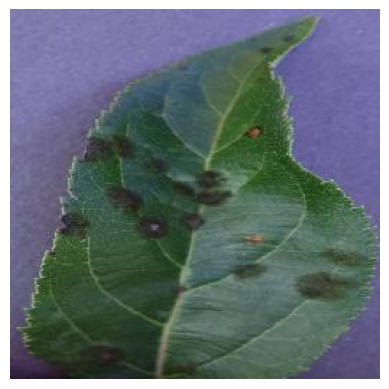

In [14]:
image_path = "/content/plantvillage dataset/color/Apple___Apple_scab/01a66316-0e98-4d3b-a56f-d78752cd043f___FREC_Scab 3003.JPG"

# Read the image
img = mpimg.imread(image_path)
print(img.shape)

# Plot the image
plt.imshow(img)
plt.axis('off')
plt.show()


In [15]:
# image Parameters
img_size = 224
batch_size = 32


Train Test Split

In [16]:
# image data generator
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2   #use 20% of data for validation
)

In [25]:
# Train Generator

train_generator=data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [26]:
# validation Generator

vaildation_generator= data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


Convolutional Neural Network

In [19]:
train_generator.num_classes

38

In [20]:
# Model Defination
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(img_size,img_size,3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(train_generator.num_classes,activation='softmax'))

In [21]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [22]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model Training

In [23]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=5,  # Number of epochs
    validation_data=vaildation_generator,
    validation_steps=vaildation_generator.samples // batch_size  # Validation steps
)

Epoch 1/5
1358/1358 [==============================] - 4695s 3s/step - loss: 0.9679 - accuracy: 0.7371 - val_loss: 0.4613 - val_accuracy: 0.8565
Epoch 2/5
1358/1358 [==============================] - 4632s 3s/step - loss: 0.2822 - accuracy: 0.9103 - val_loss: 0.4199 - val_accuracy: 0.8754
Epoch 3/5
1358/1358 [==============================] - 4522s 3s/step - loss: 0.1405 - accuracy: 0.9544 - val_loss: 0.4187 - val_accuracy: 0.8823
Epoch 4/5
1358/1358 [==============================] - 4515s 3s/step - loss: 0.0961 - accuracy: 0.9680 - val_loss: 0.4734 - val_accuracy: 0.8841
Epoch 5/5
1358/1358 [==============================] - 4481s 3s/step - loss: 0.0685 - accuracy: 0.9778 - val_loss: 0.5766 - val_accuracy: 0.8779


Model Evaluation

In [28]:
# Model Evaluation
print("Evaluating Model .....")
val_loss,val_accuracy=  model.evaluate(vaildation_generator, steps=vaildation_generator.samples//batch_size)
print(f"Validation Accuracy : {val_accuracy*100 :.2f}%" )

Evaluating Model .....
339/339 [==============================] - 283s 836ms/step - loss: 0.5766 - accuracy: 0.8779
Validation Accuracy : 87.79%


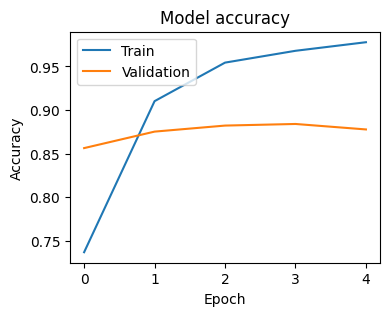

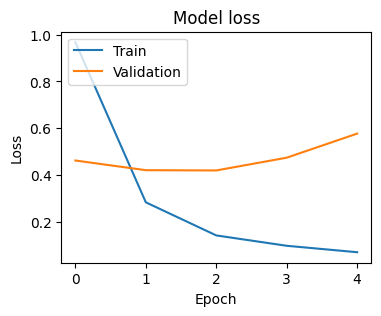

In [33]:
# Plot training and validation accuracy values
plt.figure(figsize=(4,3))

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(4,3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper left")


Building a Predictive System

In [41]:
# Function to load and preprocess the image using Pillow
def load_and_preprocess_image(image_path, target_size=(224,224)):
  # Load the image
  img=Image.open(image_path)
  # Resize the image
  img=img.resize(target_size)

  # convert the image to a numpy array
  img_array=np.array(img)

  # add batch dimention
  img_array=np.expand_dims(img_array,axis=0)

  # Scale the image values to [0,1]
  img_array=img_array.astype('float32')/255
  return img_array

# Function to Predict the Class os an Image
def predict_image_class(model, image_path,class_indices):
  processed_img=load_and_preprocess_image(image_path)
  predictions=model.predict(processed_img)
  predicted_class_index=np.argmax(predictions,axis=1)[0]
  predicted_class_name=class_indices[predicted_class_index]
  return predicted_class_name



In [35]:
# Creating a mapping from class indices to class_names
class_indices={v:k for k,v in train_generator.class_indices.items()}

In [36]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [37]:
# saving the class names as json files
json.dump(class_indices,open('class_indices.json',"w"))

In [42]:
# Example Usage
image_path='/content/apple_black_rot.S 3015.JPG'
predicted_class_name=predict_image_class(model,image_path,class_indices)

# Output
print("Predicted Class Result: ", predicted_class_name)

1/1 [==============================] - 0s 114ms/step
Predicted Class Result:  Apple___Black_rot


Save the model to google drive or local


In [43]:
# prompt: generate code to save the model

# Save the entire model to a HDF5 file.
model.save('plant_disease_prediction_model.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
